In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
# import textstat
import emoji
import re
from pymer4.utils import get_resource_path
from pymer4.models import Lmer
import statsmodels.api as smßs
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu


ImportError: Unable to import required dependencies:
numpy: cannot import name 'mixins' from partially initialized module 'numpy.lib' (most likely due to a circular import) (/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9/.venv/lib/python3.11/site-packages/numpy/lib/__init__.py)

In [ ]:
# Define the base path to your CSV files
base_path = '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9'
#base_path = '/Users/owenalberts/Desktop/Master Digital Driven Business/Digital marketing strategy/DMSteam9'

# Explicitly load each CSV file into its own DataFrame
df1 = pd.read_csv(os.path.join(base_path, 'Themeparcs I.csv'), on_bad_lines='skip', delimiter=';')
df2 = pd.read_csv(os.path.join(base_path, 'Themeparcs II.csv'), on_bad_lines='skip', delimiter=';')
df3 = pd.read_csv(os.path.join(base_path, 'Themeparcs III.csv'), on_bad_lines='skip', delimiter=';')
df4 = pd.read_csv(os.path.join(base_path, 'Themeparcs IV.csv'), on_bad_lines='skip', delimiter=';')

# Example operation: print the first few rows of the DataFrame
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
print("First few rows of Merged Themeparcs :")
merged_df.head(5)

First few rows of Merged Themeparcs :


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1090000000000,00",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","417000000000,00",33.0,NaN,NaN,NaN,"1,84E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","285000000000,00",21.0,NaN,NaN,1.0,"1,84E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","136000000000,00",478.0,NaN,1.0,NaN,"6,52E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","496000000000,00",16.0,NaN,NaN,1.0,"7,63E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In [ ]:
# Counts of unique values for a specific column
merged_df['Profile'].value_counts().head(5)

Profile
Wild Adventures Theme Park    955
Happy Hollow Park & Zoo       627
Cedar Point                   478
Walt Disney Studios (US)      450
Playland                      446
Name: count, dtype: int64

In [ ]:
# Sum up the number of reactions for each profile
reactions_sum = merged_df.groupby(['Profile', 'Profile-ID'])['Number of Reactions'].sum().reset_index()

# Sort profiles by the number of reactions in descending order and get the top 100
top_profiles = reactions_sum.sort_values('Number of Reactions', ascending=False).head(100)

top_profiles.head(10)

,Profile,Profile-ID,Number of Reactions
54,Walt Disney Animation Studios,23245476854,1745666.0
55,Walt Disney Studios (US),"1,11E+14",1343887.0
13,Disneyland,11081890741,540414.0
52,Universal Orlando Resort (US),90867402851,434662.0
56,Walt Disney World,"1,56E+11",426506.0
4,Busch Gardens Tampa Bay,68181225238,289953.0
11,Cedar Point,10625691462,256408.0
53,Universal Studios Hollywood,61784580148,236426.0
34,Santa Cruz Beach Boardwalk,40035168377,222131.0
22,Hersheypark,16994689356,209908.0


In [ ]:
# Fill NaN values with 0 for calculation
merged_df['Number of Shares'] = merged_df['Number of Shares'].fillna(0)
# merged_df['Number of Shares.1'] = merged_df['Number of Shares.1'].fillna(0)

# Calculate total shares by summing both shares columns
merged_df['total_shares'] = merged_df['Number of Shares'] + merged_df['Number of Shares.1']

# Now group by 'Profile' and sum the 'Total Shares', and then sort the sums in ascending order
shares_per_profile = merged_df.groupby('Profile')['total_shares'].sum().sort_values(ascending=False)

shares_per_profile.head(5)

Profile
Walt Disney Animation Studios    227392.0
Walt Disney Studios (US)         118026.0
Universal Orlando Resort (US)     76962.0
Walt Disney World                 59715.0
Disneyland                        51015.0
Name: total_shares, dtype: float64

## Creating our dependent variable

Unweighted engagement score ---> consisting of:
- `"Number of reactions"`
- `"total_shares"`
- `"Number of Comments (primary)"`
- `"Number of Likes"`

In [ ]:
# Function to calculate the average excluding zeros, unless all values are zero
def calculate_unweighted_average(row):
    values = [row['Number of Reactions'], row['total_shares'], row['Number of Comments (primary)'], row['Number of Likes']]
    # Remove zeros but only if not all values are zeros
    filtered_values = [value for value in values if value != 0] or values
    return np.mean(filtered_values)
 
# Apply the function to each row in the DataFrame
merged_df['Unweighted_Engagement_Score'] = merged_df.apply(calculate_unweighted_average, axis=1)
 
# Display the first few rows to verify the changes
merged_df[['Date', 'Profile', 'Message', 'Number of Reactions', 'total_shares', 'Number of Comments (primary)', 'Number of Likes', 'Unweighted_Engagement_Score']].head()

,Date,Profile,Message,Number of Reactions,total_shares,Number of Comments (primary),Number of Likes,Unweighted_Engagement_Score
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,2.0,2.0,13.0,8.250000
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,2.0,1.0,33.0,18.500000
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,3.0,2.0,21.0,12.250000
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,12.0,52.0,478.0,297.000000
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,16.0,11.666667


## Sub Question 1

##### "What content features (e.g., visual elements, text, use of hashtags) are associated with higher engagement rates in theme park brand posts on Facebook?"

`Making new features`
- `Number of hashtags`
- `Text readability`
- `Readability score`
- `Emoji count`


In [ ]:
# Making new features out of "Message" column
# -->  Count the number of hashtags in each message ----- Number of hashtags
# -->  Count the number of characters in each message ----- Text readability
# -->  Using Flesch Reading Ease formula ----- Readability score
# -->  Count the number of emojis in each message ----- Emoji count


# Count the number of characters in each message
merged_df['text_length'] = merged_df['Message'].apply(len)

# Count the number of hashtags in each message
merged_df['hashtag_count'] = merged_df['Message'].apply(lambda x: len([word for word in x.split() if word.startswith('#')]))

# What does the readability score mean?
# The Flesch Reading Ease formula will output a number from 0 to 100 - a higher score indicates easier readability.
merged_df['readability_score'] = merged_df['Message'].apply(textstat.flesch_reading_ease)

# Function to count the number of emojis in each post
def count_emojis(text):
    # Using the emoji library to count all emoji characters in the text
    return emoji.emoji_count(text)
# Apply the function to count emojis
merged_df['emoji_count'] = merged_df['Message'].apply(count_emojis)

# Print the first few rows of the DataFrame
merged_df[['Profile', 'Message', 'text_length', 'hashtag_count', 'readability_score', 'emoji_count', 'Unweighted_Engagement_Score']].head(5)

#merged_df to csv
#merged_df.to_csv('merged_df_test.csv', index=False)

,Profile,Message,text_length,hashtag_count,readability_score,emoji_count,Unweighted_Engagement_Score
0,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,337,0,74.69,7,8.250000
1,Fun Spot America,See you next year! 😉 Don’t miss...,141,4,87.72,3,18.500000
2,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,128,8,38.99,1,12.250000
3,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,45,0,48.47,3,297.000000
4,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,227,0,83.36,0,11.666667


## Sampling

In [ ]:
# Filter out entries where 'Unweighted Engagement Score' is above 600 for outliers
filtered_df = merged_df[merged_df['Unweighted_Engagement_Score'] <= 600]

## Checking for Normality to meet the assumptions for ANOVA

### Using Q-Q plots and Lilliefors normality tests
- Q-Q (quantile-quantile) plot helps visually assess if your data follows a certain distribution, such as a normal distribution. Points lying along the line indicate that the data are well-modeled by the distribution.

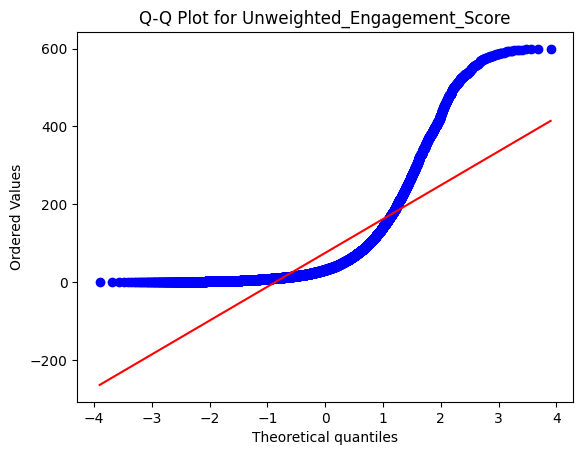

Lilliefors test statistic: 0.24004428314148069, p-value: 0.0009999999999998899


In [ ]:
# Example for 'Unweighted_Engagement_Score'
data = filtered_df['Unweighted_Engagement_Score'].dropna()
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot for Unweighted_Engagement_Score')
plt.show()

stat, p_value = lilliefors(filtered_df['Unweighted_Engagement_Score'], dist='norm')
print(f"Lilliefors test statistic: {stat}, p-value: {p_value}")

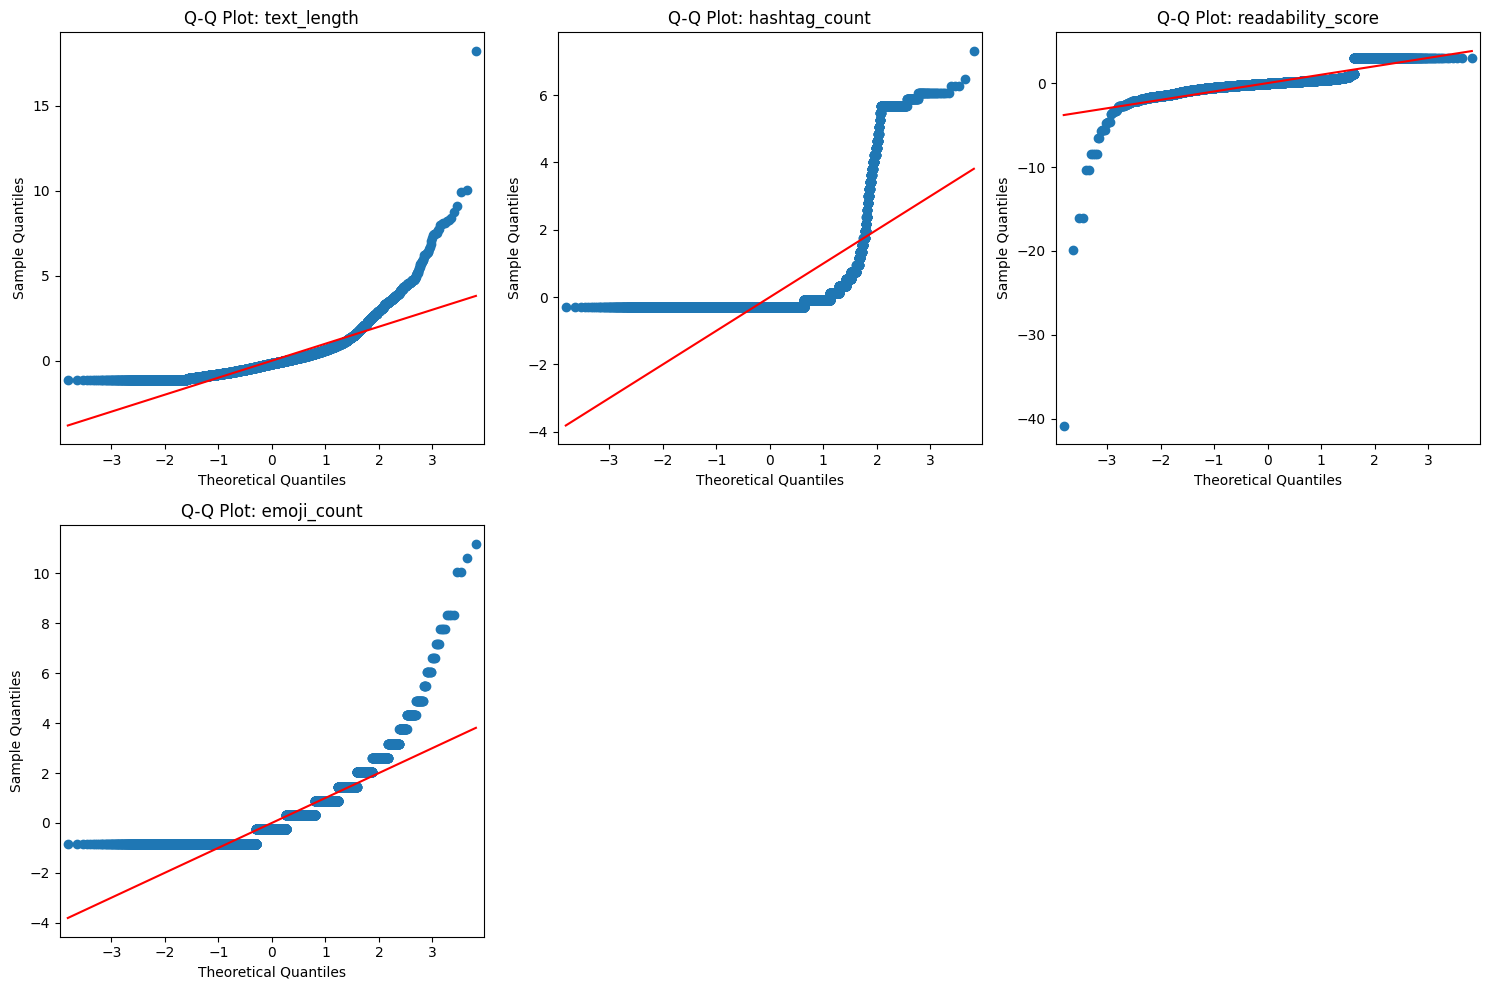

Variable: text_length
Lilliefors test statistic: 0.13109727469954868, p-value: 0.0009999999999998899

Variable: hashtag_count
Lilliefors test statistic: 0.4032886021791525, p-value: 0.0009999999999998899

Variable: readability_score
Lilliefors test statistic: 0.21607325951111245, p-value: 0.0009999999999998899

Variable: emoji_count
Lilliefors test statistic: 0.2088818815802071, p-value: 0.0009999999999998899



In [ ]:
variables_to_test = ['text_length', 'hashtag_count', 'readability_score', 'emoji_count']

# Set up the matplotlib figure for Q-Q plot analysis of the updated variables
plt.figure(figsize=(15, 10))  # Adjusting figure size for visibility

# Create a Q-Q plot for each variable in 'variables_to_test'
for i, variable in enumerate(variables_to_test, 1):
    plt.subplot(2, 3, i)  # Arrange plots in 2 rows and 3 columns
    sm.qqplot(filtered_df[variable], line='s', fit=True, ax=plt.gca())  # Generate Q-Q plot for the variable
    plt.title(f'Q-Q Plot: {variable}')

# Adjust layout to prevent overlap and ensure all titles and axes are visible
plt.tight_layout()
plt.show()


for i, variable in enumerate(variables_to_test, 1):
    print(f"Variable: {variable}")
    stat, p_value = lilliefors(filtered_df[variable], dist='norm')
    print(f"Lilliefors test statistic: {stat}, p-value: {p_value}")
    print()



## Why all 0.0009999999999998899 ???

The p-value you're seeing, 0.0009999999999998899, is very likely a limitation of the lilliefors function in statsmodels for handling p-values below a certain threshold. This value essentially represents a p-value that's very small, below the granularity or precision the test can accurately report. It's telling you that the test statistic is significant enough to reject the null hypothesis of normality for each of these variables, but it doesn't provide a more precise p-value beyond this lower limit

## Logarithmic transformation could help with right-skewed ata


In [ ]:
# Logarithmic Transformation: Effective for right-skewed data.
filtered_df['log_text_length'] = np.log1p(filtered_df['text_length'])
filtered_df['log_hashtag_count'] = np.log1p(filtered_df['hashtag_count'])
filtered_df['log_readability_score'] = np.log1p(filtered_df['readability_score'])
filtered_df['log_emoji_count'] = np.log1p(filtered_df['emoji_count'])

filtered_df['log_Unweighted_Engagement_Score'] = np.log1p(filtered_df['Unweighted_Engagement_Score'])

log_variables_to_test = ['log_text_length', 'log_hashtag_count', 'log_readability_score', 'log_emoji_count']

for i, variables in enumerate(log_variables_to_test, 1):
    print(f"Variable: {variables}")
    stat, p_value = lilliefors(filtered_df[variables], dist='norm')
    print(f"Lilliefors test statistic: {stat}, p-value: {p_value}")
    print()

Variable: log_text_length
Lilliefors test statistic: 0.15329893663854027, p-value: 0.0009999999999998899

Variable: log_hashtag_count
Lilliefors test statistic: 0.4205570279717566, p-value: 0.0009999999999998899

Variable: log_readability_score
Lilliefors test statistic: nan, p-value: nan

Variable: log_emoji_count
Lilliefors test statistic: 0.24798104978297986, p-value: 0.0009999999999998899



/var/folders/7l/b916kv5120d_jxhh50x6gjxw0000gn/T/ipykernel_36577/1656546102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_text_length'] = np.log1p(filtered_df['text_length'])
/var/folders/7l/b916kv5120d_jxhh50x6gjxw0000gn/T/ipykernel_36577/1656546102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_hashtag_count'] = np.log1p(filtered_df['hashtag_count'])
/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9/.venv/lib/python3.11/site-packages

## Notes


###

# Categorizing the variables

In [ ]:
# Display basic statistics to understand the distribution and decide on binning thresholds
filtered_df[['text_length', 'hashtag_count', 'readability_score', 'emoji_count']].describe()

,text_length,hashtag_count,readability_score,emoji_count
count,14474.000000,14474.000000,14474.000000,14474.000000
mean,247.246926,1.401409,72.488312,1.452259
std,214.236459,4.872136,44.442346,1.745730
min,1.000000,0.000000,-1739.990000,0.000000
25%,113.000000,0.000000,56.930000,0.000000
50%,210.000000,0.000000,69.855000,1.000000
75%,313.000000,1.000000,81.630000,2.000000
max,4149.000000,37.000000,206.840000,21.000000


## Notes

## Making Categories for the Kruskal-Walllis H test

In [ ]:
filtered_df1 = filtered_df.copy()

# Binning/Categorizing each variable
filtered_df1['text_length_cat'] = pd.cut(filtered_df1['text_length'], bins=[0, 108, 309, float('inf')], labels=['Short', 'Medium', 'Long'], right=False)
filtered_df1['hashtag_count_cat'] = pd.cut(filtered_df1['hashtag_count'], bins=[0, 1, 2, float('inf')], labels=['Few', 'Moderate', 'Many'], right=False)
filtered_df1['readability_score_cat'] = pd.cut(filtered_df1['readability_score'], bins=[-float('inf'), 56.96, 81.815, float('inf')], labels=['Hard', 'Moderate', 'Easy'], right=False)
filtered_df1['emoji_count_cat'] = pd.cut(filtered_df1['emoji_count'], bins=[0, 1, 2, float('inf')], labels=['Few', 'Moderate', 'Many'], right=False)

# Display the first few rows to verify the binning
display_columns = ['text_length', 'text_length_cat', 'hashtag_count', 'hashtag_count_cat', 'readability_score', 'readability_score_cat', 'emoji_count', 'emoji_count_cat', 'Unweighted_Engagement_Score']
display(filtered_df1[display_columns].head(5))

,text_length,text_length_cat,hashtag_count,hashtag_count_cat,readability_score,readability_score_cat,emoji_count,emoji_count_cat,Unweighted_Engagement_Score
0,337,Long,0,Few,74.69,Moderate,7,Many,8.250000
1,141,Medium,4,Many,87.72,Easy,3,Many,18.500000
2,128,Medium,8,Many,38.99,Hard,1,Moderate,12.250000
3,45,Short,0,Few,48.47,Hard,3,Many,297.000000
4,227,Medium,0,Few,83.36,Easy,0,Few,11.666667


In [ ]:
# List of variables for which to perform the Kruskal-Wallis H test
variables_to_test = ['text_length_cat', 'hashtag_count_cat', 'readability_score_cat', 'emoji_count_cat']

for variable in variables_to_test:
    # Initialize a list to hold data for each group
    groups = []
    
    # Get the unique categories for the variable
    categories = filtered_df1[variable].dropna().unique()
    
    for cat in categories:
        group = filtered_df1[filtered_df1[variable] == cat]['Unweighted_Engagement_Score']
        groups.append(group)
    
    # Perform the Kruskal-Wallis H test on the groups
    stat, p = kruskal(*groups)
    
    # Print the results
    print(f"Kruskal-Wallis H Test for {variable}: statistic = {stat}, p-value = {p}")

Kruskal-Wallis H Test for text_length_cat: statistic = 291.55246845705847, p-value = 4.899884939419129e-64
Kruskal-Wallis H Test for hashtag_count_cat: statistic = 753.1061729749964, p-value = 2.917913375859027e-164
Kruskal-Wallis H Test for readability_score_cat: statistic = 98.40817821284327, p-value = 4.274995028428618e-22
Kruskal-Wallis H Test for emoji_count_cat: statistic = 162.1988468111247, p-value = 6.011293453160319e-36


# Kruskal-Wallis H Test Results

The Kruskal-Wallis H test is a non-parametric test used to determine if there are statistically significant differences between the medians of two or more groups. It is an extension of the Mann-Whitney U test to more than two groups and does not assume a normal distribution of the data. Below are the results of applying the Kruskal-Wallis H test to compare the `Unweighted_Engagement_Score` across different categories of our variables.

### Text Length Category

- **H Statistic**: 291.55
- **p-value**: 4.90e-64

The extremely low p-value suggests a statistically significant difference in the engagement scores among the different text length categories. `This indicates that the length of the text significantly affects the engagement scores.`

### Hashtag Count Category

- **H Statistic**: 753.11
- **p-value**: 2.92e-164

With an even lower p-value, the results indicate a very strong statistically significant difference in engagement scores among the different hashtag count categories. `This suggests that the number of hashtags used in a post is strongly associated with variations in engagement scores.`

### Readability Score Category

- **H Statistic**: 98.41
- **p-value**: 4.27e-22

The results show a statistically significant difference in engagement scores across the different readability score categories, although the strength of the association is less pronounced compared to text length and hashtag count. `This implies that readability may influence engagement scores, but possibly to a lesser extent than the other factors.`

### Emoji Count Category

- **H Statistic**: 162.20
- **p-value**: 6.01e-36

There is a statistically significant difference in engagement scores among the different emoji count categories. `This outcome suggests that the use of emojis in a post significantly affects its engagement scores, with a strong association indicated by the very low p-value.`

## Summary

The Kruskal-Wallis H test results for `text_length_cat`, `hashtag_count_cat`, `readability_score_cat`, and `emoji_count_cat` all indicate statistically significant differences in engagement scores across the categories of these variables. The findings highlight the impact of these features on social media post engagement, with text length, hashtag count, and emoji count showing particularly strong associations.


## Making Categories for the Mann-Whitney U test

In [ ]:
filtered_df2 = filtered_df.copy()

filtered_df2['text_length_cat'] = pd.cut(filtered_df2['text_length'], bins=[0, 309, float('inf')], labels=['Low', 'High'], right=False)
filtered_df2['hashtag_count_cat'] = pd.cut(filtered_df2['hashtag_count'], bins=[0, 2, float('inf')], labels=['Low', 'High'], right=False)
filtered_df2['readability_score_cat'] = pd.cut(filtered_df2['readability_score'], bins=[-float('inf'), 81.815, float('inf')], labels=['Low', 'High'], right=False)
filtered_df2['emoji_count_cat'] = pd.cut(filtered_df2['emoji_count'], bins=[0, 2, float('inf')], labels=['Low', 'High'], right=False)

display_columns = ['text_length', 'text_length_cat', 'hashtag_count', 'hashtag_count_cat', 'readability_score', 'readability_score_cat', 'emoji_count', 'emoji_count_cat', 'Unweighted_Engagement_Score']
display(filtered_df2[display_columns].head(5))

,text_length,text_length_cat,hashtag_count,hashtag_count_cat,readability_score,readability_score_cat,emoji_count,emoji_count_cat,Unweighted_Engagement_Score
0,337,High,0,Low,74.69,Low,7,High,8.250000
1,141,Low,4,High,87.72,High,3,High,18.500000
2,128,Low,8,High,38.99,Low,1,Low,12.250000
3,45,Low,0,Low,48.47,Low,3,High,297.000000
4,227,Low,0,Low,83.36,High,0,Low,11.666667


In [ ]:
# Comparing 'Unweighted_Engagement_Score' across all 'text_length_cat' categories using Mann-Whitney U Test

group1a = filtered_df2[filtered_df2['text_length_cat'] == 'High']['Unweighted_Engagement_Score']
group2a = filtered_df2[filtered_df2['text_length_cat'] == 'Low']['Unweighted_Engagement_Score']

group1b = filtered_df2[filtered_df2['hashtag_count_cat'] == 'High']['Unweighted_Engagement_Score']
group2b = filtered_df2[filtered_df2['hashtag_count_cat'] == 'Low']['Unweighted_Engagement_Score']

group1c = filtered_df2[filtered_df2['readability_score_cat'] == 'High']['Unweighted_Engagement_Score']
group2c = filtered_df2[filtered_df2['readability_score_cat'] == 'Low']['Unweighted_Engagement_Score']

group1d = filtered_df2[filtered_df2['emoji_count_cat'] == 'High']['Unweighted_Engagement_Score']
group2d = filtered_df2[filtered_df2['emoji_count_cat'] == 'Low']['Unweighted_Engagement_Score']

# Define a list of tuples, each containing the variable name and the two groups
groups = [('text_length_cat', group1a, group2a), 
        ('hashtag_count_cat', group1b, group2b), 
        ('readability_score_cat', group1c, group2c), 
        ('emoji_count_cat', group1d, group2d)]

for var_name, group1, group2 in groups:
        stat, p = mannwhitneyu(group1, group2)
        print(f"Mann-Whitney U Test statistic: for groups {var_name} High and Low,\n {stat}, p-value: {p} ")
        print()

Mann-Whitney U Test statistic: for groups text_length_cat High and Low,
 16349851.5, p-value: 8.025135357770829e-63 

Mann-Whitney U Test statistic: for groups hashtag_count_cat High and Low,
 8579698.0, p-value: 1.0533135451075133e-81 

Mann-Whitney U Test statistic: for groups readability_score_cat High and Low,
 19680203.0, p-value: 0.38785178315227375 

Mann-Whitney U Test statistic: for groups emoji_count_cat High and Low,
 23745882.0, p-value: 3.6323519132809126e-07 



# Mann-Whitney U Test Results

The Mann-Whitney U test is a non-parametric test used to compare differences between two independent groups when the dependent variable is either ordinal or continuous but not normally distributed. The test evaluates whether one group tends to have higher or lower values than the other. Below are the interpretations of the test results for the variables `text_length_cat`, `hashtag_count_cat`, `readability_score_cat`, and `emoji_count_cat`.

### Text Length Category (High vs. Low)

- **U Statistic**: 16349851.5
- **p-value**: 8.03e-63

The extremely low p-value indicates that there is a statistically significant difference in the `Unweighted_Engagement_Score` between posts with high text length and those with low text length. Specifically, one of these groups tends to have a higher engagement score than the other.

### Hashtag Count Category (High vs. Low)

- **U Statistic**: 8579698.0
- **p-value**: 1.05e-81

Similar to the text length, the p-value for the hashtag count comparison is extremely low, signifying a statistically significant difference in engagement scores between posts with a high number of hashtags and those with a low number. Again, this suggests that the quantity of hashtags influences engagement scores.

### Readability Score Category (High vs. Low)

- **U Statistic**: 19680203.0
- **p-value**: 0.388

Unlike the previous variables, the p-value for readability score is above the common alpha level of 0.05, indicating that there is no statistically significant difference in engagement scores between posts categorized as having high readability and those categorized as having low readability.

### Emoji Count Category (High vs. Low)

- **U Statistic**: 23745882.0
- **p-value**: 3.63e-07

The p-value is significantly low for the emoji count comparison, indicating a statistically significant difference in engagement scores between posts with a high number of emojis and those with a low number. This outcome suggests that the presence of emojis is associated with differences in engagement scores.

# Summary

The Mann-Whitney U tests reveal that `text_length`, `hashtag_count`, and `emoji_count` are significantly associated with differences in `Unweighted_Engagement_Score`, with `readability_score` not showing a significant association. These results highlight the importance of these features in influencing engagement on social media posts.


##

# Key Takeaways of both Krukal-Wallis and Mann-Whitney

- `Text length`, `hashtag count`, and `emoji count` are strongly associated with engagement across both binary and multi-category analyses.
- `Readability` score showed significant differences only when multiple categories were considered, suggesting a more nuanced effect on engagement.
- The outcomes of both tests together provide a comprehensive understanding of how various post characteristics influence engagement on social media. While direct comparisons (High vs. Low) are insightful, examining the effect across a broader range of categories can uncover additional nuances in how these features impact engagement.

In [ ]:
filtered_df2.head(5)

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,emoji_count,log_text_length,log_hashtag_count,log_readability_score,log_emoji_count,log_Unweighted_Engagement_Score,text_length_cat,hashtag_count_cat,readability_score_cat,emoji_count_cat
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,"1,09E+12",...,7,5.823046,0.000000,4.326646,2.079442,2.224624,High,Low,Low,High
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,"4,17E+11",...,3,4.955827,1.609438,4.485485,1.386294,2.970414,Low,High,High,High
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,"2,85E+11",...,1,4.859812,2.197225,3.688629,0.693147,2.583998,Low,High,Low,Low
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,"1,36E+11",...,3,3.828641,0.000000,3.901366,1.386294,5.697093,Low,Low,Low,High
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,"4,96E+11",...,0,5.429346,0.000000,4.435093,0.000000,2.538974,Low,Low,High,Low


In [ ]:
num_unique_profiles = filtered_df2['Profile'].nunique()
print(f"The number of unique profiles is: {num_unique_profiles}")

The number of unique profiles is: 59


# Pymer4

In [ ]:
# pymer package
from pymer4.models import Lmer
from pymer4.utils import get_resource_path

# Load the data
data = filtered_df2

# Define the model
model = Lmer("Unweighted_Engagement_Score ~ C(text_length_cat) + C(hashtag_count_cat) + C(readability_score_cat) + C(emoji_count_cat) + (1 | Profile)", data=data)

# Fit the model
model.fit()

Linear mixed model fit by REML [’lmerMod’]
Formula: Unweighted_Engagement_Score~C(text_length_cat)+C(hashtag_count_cat)+C(readability_score_cat)+C(emoji_count_cat)+(1|Profile)

Family: gaussian	 Inference: parametric

Number of observations: 14474	 Groups: {'Profile': 59.0}

Log-likelihood: -84464.356 	 AIC: 168942.711

Random effects:

                 Name       Var     Std
Profile   (Intercept)  7109.987  84.321
Residual               6722.324  81.990

No random effect correlations specified

Fixed effects:



/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),84.991,63.288,106.693,11.073,58.552,7.675,0.000,***
C(text_length_cat).L,3.893,1.382,6.403,1.281,14437.005,3.039,0.002,**
C(hashtag_count_cat).L,0.627,-3.008,4.263,1.855,14468.714,0.338,0.735,
C(readability_score_cat).L,0.469,-1.905,2.842,1.211,14417.636,0.387,0.699,
C(emoji_count_cat).L,-1.099,-3.292,1.093,1.119,14441.086,-0.983,0.326,


In [ ]:
# model.ranef contains the random effects
print("The random effects are:")
print(model.ranef)


The random effects are:
                                             X.Intercept.
ACN - America's Coaster Network                -75.519561
Adventure City                                 -52.013356
Belmont Park                                   -75.011312
Big Kahuna's NJ                                -69.201700
Busch Gardens Tampa Bay                         19.616734
Busch Gardens Williamsburg                       6.395694
Calaway Park                                   -63.758861
California's Great America                     -45.977341
Canada's Wonderland                             -4.205692
Castles & Coasters                             -86.474032
Castles N Coasters                             -70.629659
Cedar Point                                     44.585994
Centreville Amusement Park                     -66.276617
Disneyland                                     233.360879
Disneyland Paris                                72.800726
Elitch Gardens                                 -

In [ ]:
# model.fixedef
print("The fixed effects are:")
print(model.fixef)

The fixed effects are:
                                             (Intercept)  \
ACN - America's Coaster Network                 9.471024   
Adventure City                                 32.977229   
Belmont Park                                    9.979272   
Big Kahuna's NJ                                15.788884   
Busch Gardens Tampa Bay                       104.607318   
Busch Gardens Williamsburg                     91.386279   
Calaway Park                                   21.231723   
California's Great America                     39.013243   
Canada's Wonderland                            80.784893   
Castles & Coasters                             -1.483447   
Castles N Coasters                             14.360925   
Cedar Point                                   129.576579   
Centreville Amusement Park                     18.713967   
Disneyland                                    318.351463   
Disneyland Paris                              157.791311   
Elitch Gardens   

<Axes: xlabel='Estimate'>

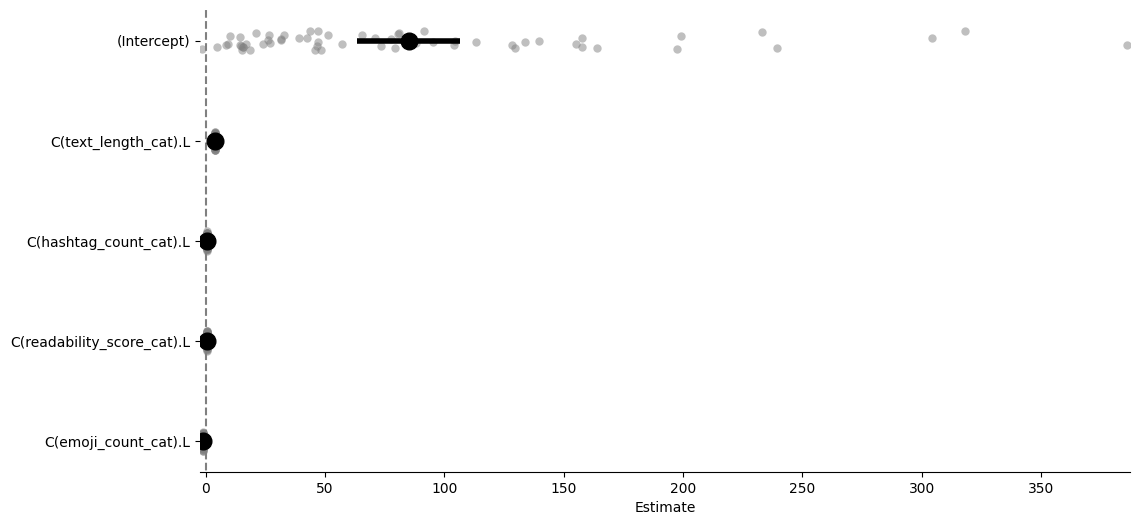

In [ ]:
# Plotting fitted vs. observed outcomes
model.plot_summary()

In [ ]:
model.data.head(5)

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,log_hashtag_count,log_readability_score,log_emoji_count,log_Unweighted_Engagement_Score,text_length_cat,hashtag_count_cat,readability_score_cat,emoji_count_cat,residuals,fits
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,"1,09E+12",...,0.000000,4.326646,2.079442,2.224624,High,Low,Low,High,-38.912989,47.162989
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,"4,17E+11",...,1.609438,4.485485,1.386294,2.970414,Low,High,High,High,6.847694,11.652306
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,"2,85E+11",...,2.197225,3.688629,0.693147,2.583998,Low,High,Low,Low,-0.294243,12.544243
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,"1,36E+11",...,0.000000,3.901366,1.386294,5.697093,Low,Low,Low,High,143.513485,153.486515
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,"4,96E+11",...,0.000000,4.435093,0.000000,2.538974,Low,Low,High,Low,-51.615314,63.281981


<Axes: xlabel='fits', ylabel='Unweighted_Engagement_Score'>

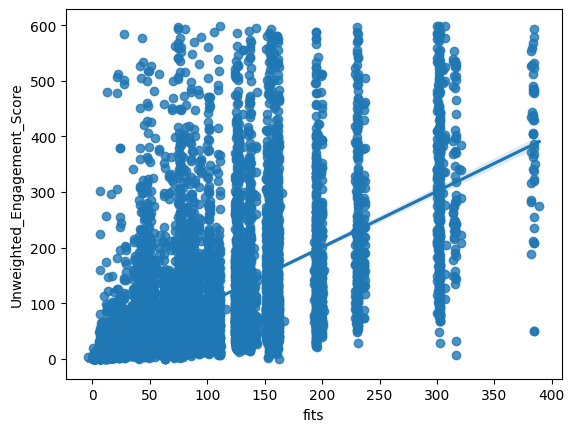

In [ ]:
import seaborn as sns

# plot model predicted values against true values
Y = model.data['Unweighted_Engagement_Score']

sns.regplot
sns.regplot(x='fits', y=Y, data=model.data, fit_reg=True)